<a href="https://colab.research.google.com/github/Amirahashem/StoreSales-WeatherFuelImpact/blob/main/Project_IDB.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [ ]:
import pandas as pd
import numpy as np
# Load the weatherdata from the supplied file"weather .csv"
sales_df = pd.read_csv("/content/drive/MyDrive/datasets/data/data.csv")
fuel_df = pd.read_csv("/content/drive/MyDrive/datasets/fuel pricing.csv")
weather_df = pd.read_csv("/content/drive/MyDrive/datasets/weather.csv")


In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
display(weather_df)

# shows the average temperature in each retail region over time
average = weather_df['Temperature'].groupby(weather_df['Store']).mean()
display(average)

# Display all columns and data types
print(sales_df.dtypes)
print(weather_df.dtypes)
print(fuel_df.dtypes)

# Show the top 10 rows of each dataset
print(sales_df.head(10))
print(weather_df.head(10))
print(fuel_df.head(10))

# Show basic statistics for numeric columns
print(sales_df.describe())
print(weather_df.describe())
print(fuel_df.describe())

# Show missing values for each column
print(sales_df.isnull().sum())
print(weather_df.isnull().sum())
print(fuel_df.isnull().sum())

# Show negative sales values
print(sales_df[sales_df['Weekly_Sales'] < 0])
print(sales_df[sales_df['Weekly_Sales'] == 0])
# Show zero or negative fuel prices
print(fuel_df[fuel_df['Fuel_Price'] <= 0])

print(sales_df.info())
print(fuel_df.info())
print(weather_df.info())

sales_df.fillna(0, inplace=True)

# Replace negative sales values with 0

sales_df.col[sales_df['Weekly_Sales'] < 0, 'Weekly_Sales'] =0

weather_df['Date'] = pd.to_datetime(weather_df['Date'], format='%Y-%m-%d')
negative_dates = weather_df.loc[weather_df['Date'] < pd.Timestamp(0)]
display(negative_dates)

# Replace missing temperature values with median temperature
median_temp = weather_df['Temperature'].median()
weather_df['Temperature'].fillna(median_temp, inplace=True)
display(median_temp )

# Show negative date of fuel_df
fuel_df['Date'] = pd.to_datetime(fuel_df['Date'], format='%Y-%m-%d')
negative_date = fuel_df.loc[fuel_df['Date'] < pd.Timestamp(0)]
display(negative_date)

# Show negative and zeros price of fuel_df
fuel_df.loc[fuel_df['Fuel_Price']<=0]

# Drop all duplicate rows
# drop_d_salary = sales_df.drop_duplicates()
# display(drop_d_salary)

# drop_d_weather = weather_df.drop_duplicates()
# display(drop_d_weather)

# drop_d_fuel = fuel_df.drop_duplicates()
# display(drop_d_fuel)

# Merge sales and weather data on date and store columns
merged_df = pd.merge(sales_df, weather_df, on=['Date', 'Store'])

# Merge fuel data on date column
merged_df = pd.merge(merged_df, fuel_df, on=['Date', 'Store'])
display(merged_df)


,Store,Date,Temperature
0,1,2010-02-05,42.31
1,1,2010-02-12,38.51
2,1,2010-02-19,39.93
3,1,2010-02-26,46.63
4,1,2010-03-05,46.50
...,...,...,...
8185,45,2013-06-28,76.05
8186,45,2013-07-05,77.50
8187,45,2013-07-12,79.37
8188,45,2013-07-19,82.84


Store
1     66.912033
2     66.728407
3     70.394176
4     61.416648
5     68.224505
6     68.504670
7     37.921264
8     61.180220
9     66.269505
10    71.329121
11    71.217308
12    69.251703
13    52.308407
14    56.256154
15    50.323242
16    43.382582
17    45.093901
18    51.866319
19    50.860330
20    53.886593
21    67.407418
22    53.464231
23    47.248242
24    52.510165
25    50.792473
26    42.268956
27    55.821813
28    69.251703
29    53.464231
30    67.407418
31    67.407418
32    51.223516
33    75.438077
34    58.107912
35    55.821813
36    70.232308
37    70.232308
38    69.251703
39    69.695385
40    46.167857
41    46.974890
42    71.329121
43    67.618297
44    52.308407
45    56.256154
Name: Temperature, dtype: float64

Store                    int64
Category                 int64
Date            datetime64[ns]
Weekly_Sales           float64
Holiday                   bool
dtype: object
Store                   int64
Date           datetime64[ns]
Temperature           float64
dtype: object
Store                  int64
Date          datetime64[ns]
Fuel_Price           float64
dtype: object
   Store  Category       Date  Weekly_Sales  Holiday
0      1         1 2010-02-05      24924.50    False
1      1         1 2010-02-12      46039.49     True
2      1         1 2010-02-19      41595.55    False
3      1         1 2010-02-26      19403.54    False
4      1         1 2010-03-05      21827.90    False
5      1         1 2010-03-12      21043.39    False
6      1         1 2010-03-19      22136.64    False
7      1         1 2010-03-26      26229.21    False
8      1         1 2010-04-02      57258.43    False
9      1         1 2010-04-09      42960.91    False
   Store       Date  Temperature
0      1 2

AttributeError: ignored

In [ ]:
from sklearn.neural_network import MLPRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.model_selection import train_test_split

Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


Visualization

In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [ ]:
from operator import imod
df = pd.read_csv("/content/drive/MyDrive/datasets/data/data.csv")

# x is input
# y is output
x = df["Date"]
y = df["Weekly_Sales"]

<ipython-input-12-487af1403316>:1: MatplotlibDeprecationWarning: The seaborn styles shipped by Matplotlib are deprecated since 3.6, as they no longer correspond to the styles shipped by seaborn. However, they will remain available as 'seaborn-v0_8-<style>'. Alternatively, directly use the seaborn API instead.
  plt.style.use('seaborn')


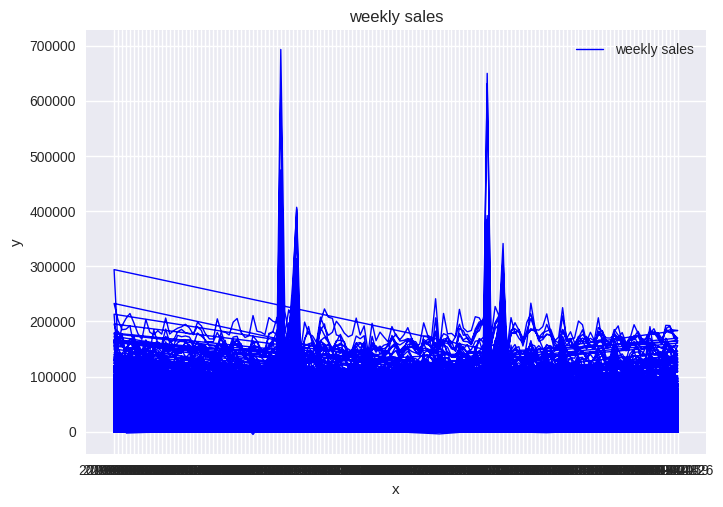

In [ ]:
plt.style.use('seaborn')
plt.title("weekly sales") # title
plt.xlabel("x") # x-axis
plt.ylabel("y") # y-axis

plt.plot(x,y,color="blue",linestyle="solid",linewidth =1,label = "weekly sales")
plt.legend()

plt.show()

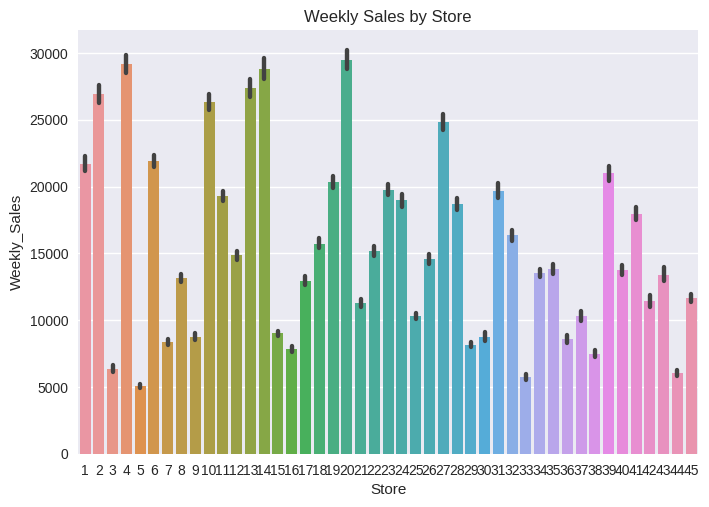

In [ ]:
import seaborn as sns
import pandas as pd

#Create a data frame
data = {'Store': df["Store"], 'Weekly_Sales': df["Weekly_Sales"]}
df = pd.DataFrame(data)

# Create chart using seaborn
sns.barplot(x='Store', y='Weekly_Sales', data=df)

# Add a title to the chart
plt.title("Weekly Sales by Store")

#Show the chart
plt.show()

In [ ]:
import pandas as pd

# Read in the sales data from CSV file
sales_data = pd.read_csv('/content/drive/MyDrive/datasets/data/data.csv')

# Group the sales data by store and calculate the total sales
store_sales = sales_data.groupby('Store')['Weekly_Sales'].sum().reset_index()

# Sort the store sales in descending order
store_sales_sorted = store_sales.sort_values(by='Weekly_Sales', ascending=False)

# Select the top ten stores
top_ten_stores = store_sales_sorted.head(10)

# Print the top ten stores
print(top_ten_stores)

    Store  Weekly_Sales
19     20  3.013978e+08
3       4  2.995440e+08
13     14  2.889999e+08
12     13  2.865177e+08
1       2  2.753824e+08
9      10  2.716177e+08
26     27  2.538559e+08
5       6  2.237561e+08
0       1  2.224028e+08
38     39  2.074455e+08


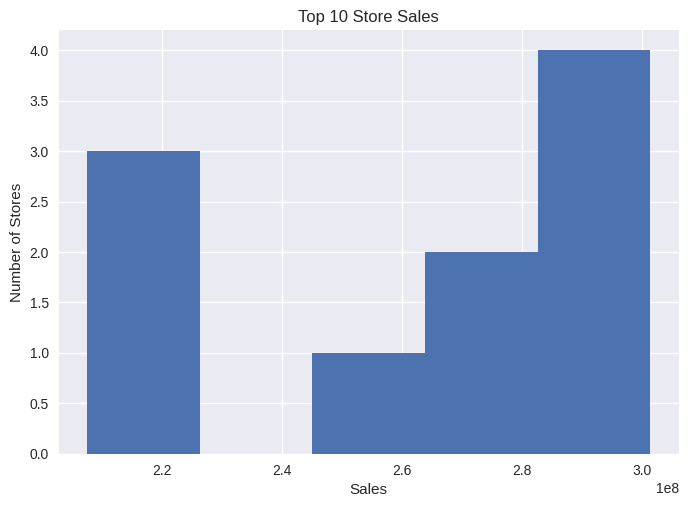

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd

# Read in the sales data from a CSV file
sales_data = pd.read_csv("/content/drive/MyDrive/datasets/data/data.csv")

# Group the sales data by store and sum the sales
store_sales = sales_data.groupby("Store")["Weekly_Sales"].sum()

# Sort the stores by sales in descending order and select the top 10
top_stores = store_sales.sort_values(ascending=False)[:10]

# Create a histogram of the top 10 store sales
plt.hist(top_stores, bins=5)

# Add labels and title to the chart
plt.xlabel('Sales')
plt.ylabel('Number of Stores')
plt.title('Top 10 Store Sales')

# Display the chart
plt.show()

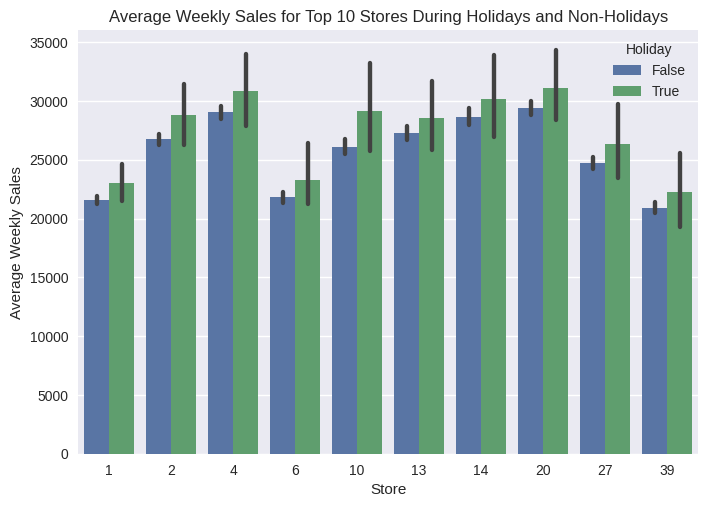

In [ ]:
import pandas as pd
import seaborn as sns
# Read in the sales data from a CSV file
sales_data = pd.read_csv("/content/drive/MyDrive/datasets/data/data.csv")

# Group the sales data by store, week, and holiday status and calculate the mean sales
store_sales = sales_data.groupby(["Store", "Date", "Holiday"])["Weekly_Sales"].mean().reset_index()

# Sort the stores by total sales in descending order and select the top 10
top_stores = store_sales.groupby("Store")["Weekly_Sales"].sum().sort_values(ascending=False)[:10].index

# Filter the data to include only the top 10 stores
top_store_sales = store_sales[store_sales["Store"].isin(top_stores)]

# Create a bar plot of the average weekly sales for the top 10 stores, with separate bars for holidays and non-holidays
sns.barplot(x="Store", y="Weekly_Sales", hue="Holiday", data=top_store_sales)

# Add labels and title to the chart
plt.xlabel("Store")
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Top 10 Stores During Holidays and Non-Holidays')

# Display the chart
plt.show()

Text(0.5, 1.0, 'Average Weekly Sales for Each Brand Department for Top 10 Selling Stores')

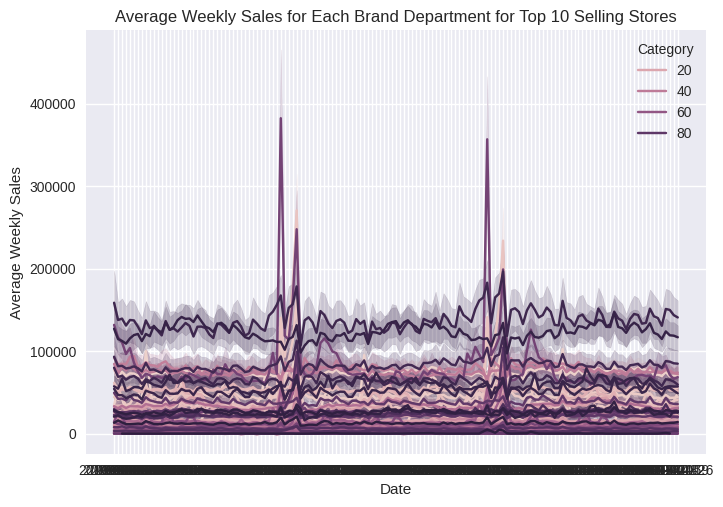

In [ ]:
import pandas as pd
import seaborn as sns

# Read in the sales data from a CSV file
sales_data = pd.read_csv("/content/drive/MyDrive/datasets/data/data.csv")

# Group the sales data by store, brand department, and week and calculate the mean sales
department_sales = sales_data.groupby(['Store', 'Category', 'Date'])['Weekly_Sales'].mean().reset_index()

# Sort the stores by total sales in descending order and select the top 10
top_stores = department_sales.groupby('Store')['Weekly_Sales'].sum().sort_values(ascending=False)[:10].index

# Filter the data to include only the top 10 stores
top_department_sales = department_sales[department_sales['Store'].isin(top_stores)]

# Create a line plot of the average weekly sales for each brand department for the top 10 stores
sns.lineplot(x='Date', y='Weekly_Sales', hue='Category', data=top_department_sales)

# Add labels and title to the chart
plt.xlabel('Date')
plt.ylabel('Average Weekly Sales')
plt.title('Average Weekly Sales for Each Brand Department for Top 10 Selling Stores')

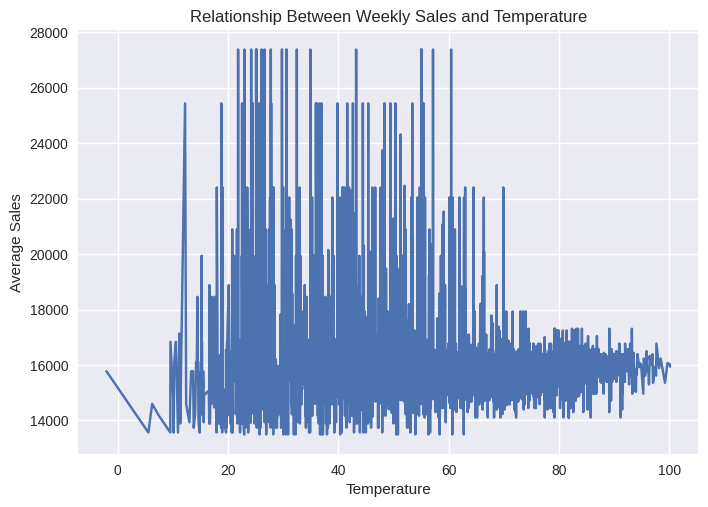

In [ ]:
import pandas as pd
import matplotlib.pyplot as plt

# Read in the sales data and temperature data from CSV files
sales_data = pd.read_csv('/content/drive/MyDrive/datasets/data/data.csv')
temp_data = pd.read_csv('/content/drive/MyDrive/datasets/weather.csv')

# Merge the sales data and temperature data on the week column
merged_data = pd.merge(sales_data, temp_data, on='Date')

# Group the merged data by temperature and calculate the mean sales
temp_sales = merged_data.groupby('Temperature')["Weekly_Sales"].mean()

# Create a line chart of the average sales by temperature
plt.plot(temp_sales.index, temp_sales.values)

# Add labels and title to the chart
plt.xlabel('Temperature')
plt.ylabel('Average Sales')
plt.title('Relationship Between Weekly Sales and Temperature')

# Display the chart
plt.show()

In [ ]:
from operator import imod
df= pd.read_csv("/content/drive/MyDrive/datasets/fuel pricing.csv")

w = df ["Fuel_Price"]
df= pd.read_csv("/content/drive/MyDrive/datasets/weather.csv")
v= df["Temperature"]


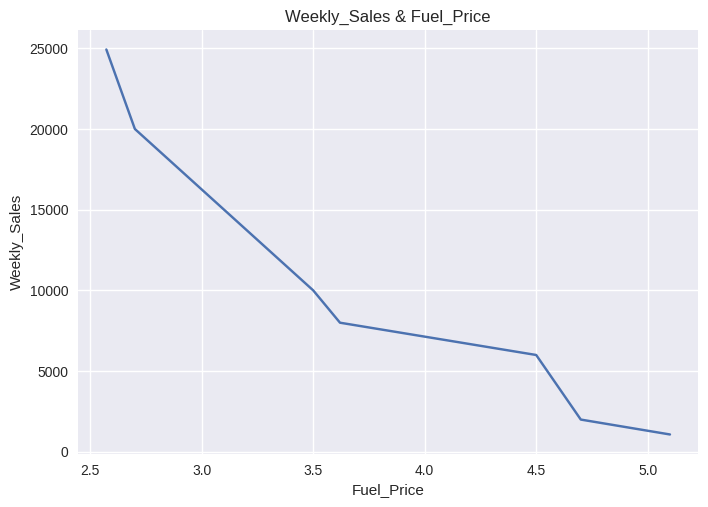

In [ ]:
import matplotlib.pyplot as plt
import seaborn as sns

#Fuel cost data
Fuel_Price = [2.572, 2.7, 3.5, 3.62, 4.5, 4.7, 5.1]

#Weekly sales data
Weekly_Sales= [24924.5, 20000, 10000, 8000, 6000, 2000, 1076.8]

#Draw a line graph
plt.plot(Fuel_Price, Weekly_Sales)

#Add a title to the chart
plt.title("Weekly_Sales & Fuel_Price")

#X_axis
plt.xlabel("Fuel_Price")

#Y_axis
plt.ylabel("Weekly_Sales")

#Show the chart
plt.show()

In [ ]:
x.shape

(421570,)

In [ ]:
!pip install scikit-learn

from sklearn.metrics import confusion_matrix # performance measurement
from sklearn.preprocessing import MinMaxScaler  # normalization
from sklearn import preprocessing # labaling
from sklearn.model_selection import train_test_split # split data
from sklearn.metrics import accuracy_score # calculate accuracy
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error
# from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import r2_score  # Print the accuracy of each model using R-squared

sales_df = sales_df.dropna()

x = sales_df.drop(columns=['Weekly_Sales','Date'])
# x = sales_df[['Date','Holiday']]
y = sales_df['Weekly_Sales']
display(x)
display(y)
lb = preprocessing.LabelEncoder()
x['Holiday'] = lb.fit_transform(x['Holiday'])
display(x)



Looking in indexes: https://pypi.org/simple, https://us-python.pkg.dev/colab-wheels/public/simple/


,Store,Category,Holiday
0,1,1,False
1,1,1,True
2,1,1,False
3,1,1,False
4,1,1,False
...,...,...,...
421565,45,98,False
421566,45,98,False
421567,45,98,False
421568,45,98,False


0         24924.50
1         46039.49
2         41595.55
3         19403.54
4         21827.90
            ...   
421565      508.37
421566      628.10
421567     1061.02
421568      760.01
421569     1076.80
Name: Weekly_Sales, Length: 421570, dtype: float64

,Store,Category,Holiday
0,1,1,0
1,1,1,1
2,1,1,0
3,1,1,0
4,1,1,0
...,...,...,...
421565,45,98,0
421566,45,98,0
421567,45,98,0
421568,45,98,0


In [ ]:
# x_with_ws = sales_df.copy()

# # Apply scaler
# scaler = MinMaxScaler(feature_range=(0,1))
# x_with_ws[['Weekly_Sales']] = scaler.fit_transform(x_with_ws[['Weekly_Sales']])
# # Drop column again
# x = x_with_ws.drop(columns=['Weekly_Sales'])
# x = x_with_ws.drop(columns=['Weekly_Sales'])
# # Verify result
# display(x_with_ws)

# scale *normalization*
# scaler = MinMaxScaler(feature_range=(0,1))
# y[['Weekly_Sales']]= scaler.fit_transform(y[['Weekly_Sales']])
# display(y)


In [ ]:
#  Linear Regression Algorithm
#  Data splitting for training and testing
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.2)

# import libraries
from sklearn.linear_model import LinearRegression
# from sklearn.metrics import accuracy_score
# from sklearn.feature_extraction.text import CountVectorizer

# vectorize the text data
# vectorizer = CountVectorizer()
# X_train = vectorizer.fit_transform(sales_df['Date'],['Holiday'])
# y_train = sales_df['Weekly_Sales']
# X_test = vectorizer.fit_transform(sales_df['Date'],['Holiday'])
# y_test = sales_df['Weekly_Sales']


# modeling Linear Regression
model = LinearRegression()

model.fit(x_train, y_train)

prediction1 =model.predict(x_test)
accuracy1 = r2_score(y_test, prediction1)
print(accuracy1)
print(prediction1)

0.029817053047587416
[20316.26840993  8733.73344515 15467.69393868 ... 14618.81778419
 18436.37821637 12610.45604315]


In [ ]:
# logistic Regression Algorithm
from sklearn.linear_model import LogisticRegression
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.metrics import accuracy_score, classification_report


# vectorize the text data
# vectorizer = CountVectorizer()
# x_train = vectorizer.fit_transform(sales_df[['Holiday','Date']])
# y_train = sales_df['Weekly_Sales']
# y_train = y_train.values
# x_test = vectorizer.fit_transform(sales_df[['Holiday','Date']])

# y_test = sales_df['Weekly_Sales']

model2 = LogisticRegression()
model.fit(x_train, y_train)

prediction2 =model.predict(x_test)
accuracy2 = r2_score(y_test, prediction2)
print(accuracy2)
print(prediction2)

0.029817053047587416
[20316.26840993  8733.73344515 15467.69393868 ... 14618.81778419
 18436.37821637 12610.45604315]
